In [7]:
import os
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import pickle


mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

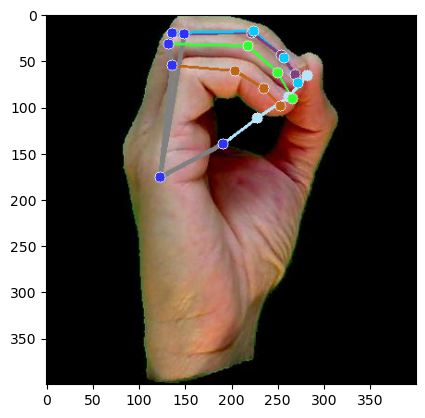

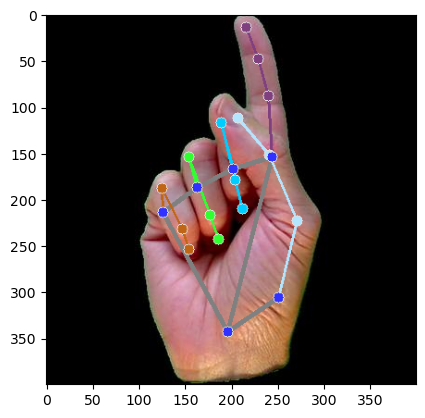

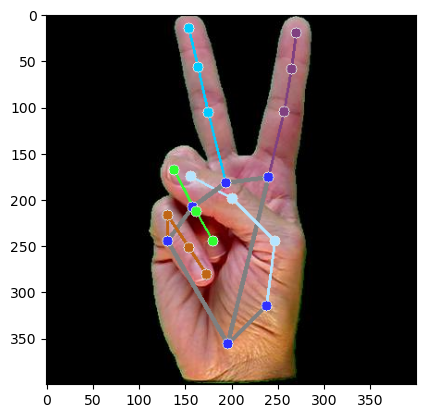

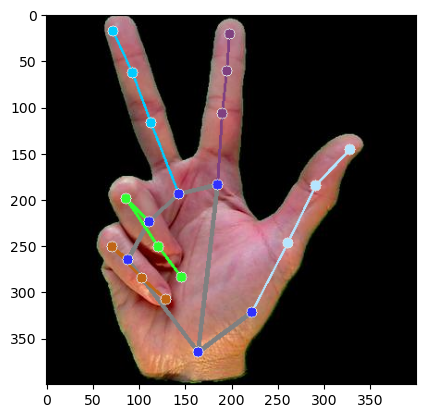

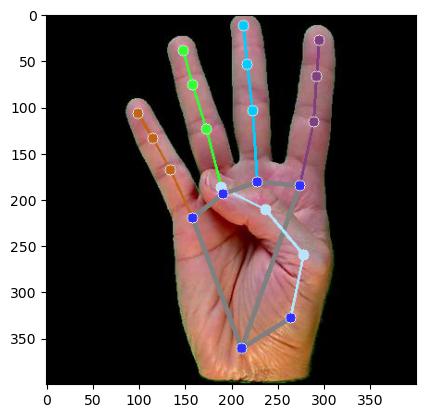

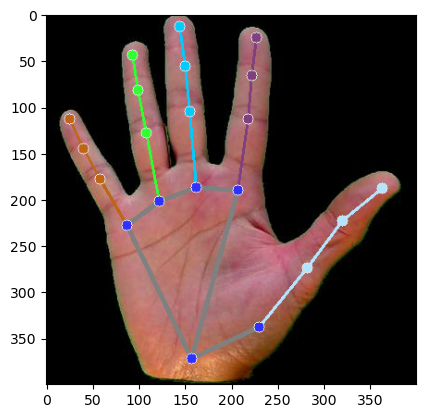

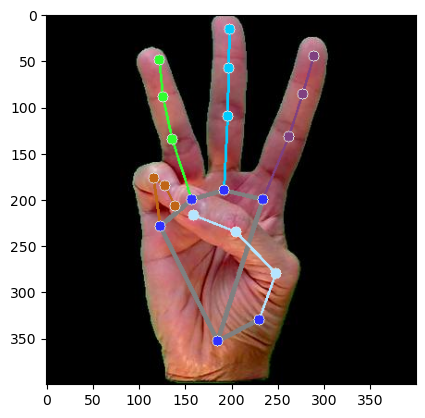

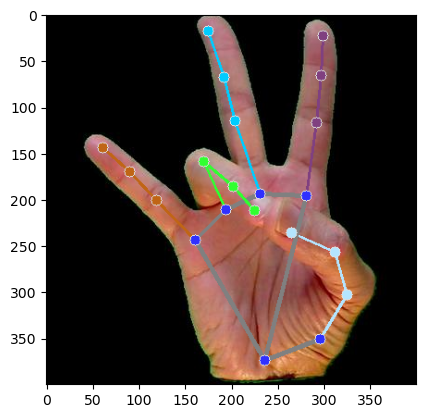

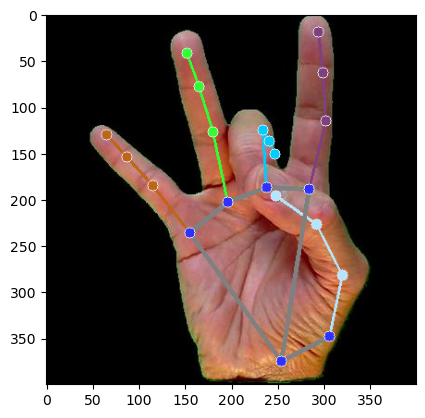

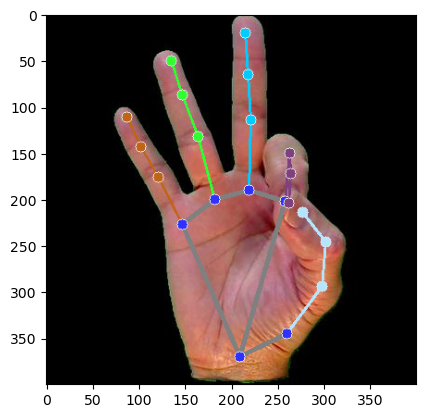

In [8]:
asl_dir = '../archive/asl_dataset'

x = []
labels = []
    
for dir in os.listdir((asl_dir)):
    for images in os.listdir(os.path.join(asl_dir, dir))[:1]:
       
        data = []
        img = cv2.imread(os.path.join(asl_dir, dir, images))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        with mp_hands.Hands(static_image_mode = True, model_complexity=0, min_detection_confidence=0.3, min_tracking_confidence=0.3, max_num_hands = 1) as hands:    
            results = hands.process(img_rgb)
            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    # for i in range(len(hand_landmarks.landmark)):
                    #     image_x = hand_landmarks.landmark[i].x
                    #     image_y = hand_landmarks.landmark[i].y
                    #     data.append(image_x)
                    #     data.append(image_y)    
                    mp_drawing.draw_landmarks(img_rgb,
                                            hand_landmarks,
                                            mp_hands.HAND_CONNECTIONS,
                                            mp_drawing_styles.get_default_hand_landmarks_style(),
                                            mp_drawing_styles.get_default_hand_connections_style())
            plt.figure()
            plt.imshow(img_rgb)    
#                   if data:
#                       x.append(data)
#                       labels.append(dir)
# print(labels)

# f = open('nums.pickle', 'wb')
# pickle.dump({'x' : x, 'labels' : labels}, f)
# f.close()


In [5]:
#Landmark testing on webcam

cap = cv2.VideoCapture(0)
with mp_hands.Hands(model_complexity=0, min_detection_confidence=0.5, min_tracking_confidence=0.5, max_num_hands = 1) as hands:
    
    while (cap.isOpened()):
        ret, frame = cap.read()
        
        frame.flags.writeable = False
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(frame)
        frame.flags.writeable = True
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                frame,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())
        cv2.imshow('MediaPipe Hands', cv2.flip(frame, 1))
        
        if cv2.waitKey(1) & 0xFF == ord('q') :
            cap.release()
            cv2.destroyAllWindows()
            break